In [131]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
# kagglehub.login()

In [132]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e4_path = kagglehub.competition_download('playground-series-s5e4')

print('Data source import complete.')


Data source import complete.


In [133]:
import pandas as pd
import os

In [134]:
train_path = os.path.join(playground_series_s5e4_path, 'train.csv')

# Load datasets
df = pd.read_csv(train_path)

In [135]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [136]:
df = df.drop(columns=['id'])

In [137]:
df.columns, df.shape

(Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
        'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
        'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
        'Listening_Time_minutes'],
       dtype='object'),
 (750000, 11))

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 62.9+ MB


In [139]:
def columnInfo(columnName: str) -> None:
    """
    Compare column statistics between train (df) and test (test_df) DataFrames.
    Prints data type, non‑null count, missing values, unique values (up to 20),
    top value counts, and descriptive statistics for each.
    """
    for name, dataset in [('Train', df), ('Test', test_df)]:
        print(f"\n=== {name} Data: '{columnName}' ===")
        if columnName not in dataset.columns:
            print(f"Column '{columnName}' not found in {name} set.")
            continue

        col = dataset[columnName]
        print(f"Data type:       {col.dtype}")
        print(f"Total entries:   {len(col)}")
        print(f"Non‐null count:  {col.count()}")
        print(f"Missing values:  {col.isna().sum()}")
        # unique values
        nunique = col.nunique(dropna=False)
        uniques = col.unique()
        print('-------------------------------------------')
        print(f"Unique values ({nunique}): {uniques}")
        print('-------------------------------------------')

        print("\nTop value counts:")
        print(col.value_counts(dropna=False).head(10))
        print('-------------------------------------------')

        print("\nDescriptive statistics:")
        print(col.describe(include='all'))
        print('-------------------------------------------')

        print("\nColumn info():")
        dataset[[columnName]].info()
        print('==================================================================')

    train_uniques = set(df[columnName].unique())
    test_uniques = set(test_df[columnName].unique())
    isSame = train_uniques == test_uniques
    print("Are all unique values in train and test the same?", isSame)

    if not isSame:
        print("Unique in train but not in test:", train_uniques - test_uniques)
        print("Unique in test but not in train:", test_uniques - train_uniques)


In [140]:
# (Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
#         'Genre', 'Host_Popularity_percentage', 'Publication_Day',
#         'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
#         'Episode_Sentiment', 'Listening_Time_minutes'],

In [141]:
columnInfo('Publication_Time')


=== Train Data: 'Publication_Time' ===
Data type:       object
Total entries:   750000
Non‐null count:  750000
Missing values:  0
-------------------------------------------
Unique values (4): ['Night' 'Afternoon' 'Evening' 'Morning']
-------------------------------------------

Top value counts:
Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64
-------------------------------------------

Descriptive statistics:
count     750000
unique         4
top        Night
freq      196849
Name: Publication_Time, dtype: object
-------------------------------------------

Column info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Publication_Time  750000 non-null  object
dtypes: object(1)
memory usage: 5.7+ MB

=== Test Data: 'Publication_Time' ===
Data type:   

## ✅ Dataset Column Checklist — Kaggle S5E4: Predict Podcast Listening Time

This checklist helps validate each feature in the dataset during EDA and preprocessing steps.

---

## 📊 Columns Overview

| Column                        | Description                            | Verified | Notes |
|------------------------------|----------------------------------------|----------|-------|
| `id`                         | Unique identifier for each sample      | ☑️       |       |
| `Podcast_Name`               | Name of the podcast                    | ☑️       |  1,3(int8)   |
| `Episode_Title`              | Title of the episode                   | ☑️       |  1,3(int8)   |
| `Episode_Length_minutes`     | Duration of episode in minutes         | ☑️       |   2   |
| `Genre`                      | Podcast genre                          | ☑️       |   1,3(int8)  |
| `Host_Popularity_percentage` | Host popularity score (0–100%)         | ☑️       |  3(float16)  |
| `Publication_Day`            | Day of the week episode was published  | ☑️       |  1,3(int8)   |
| `Publication_Time`           | Time of publication                    | ☑️ / ⬜️   |   1,3(int8) |
| `Guest_Popularity_percentage`| Guest popularity score (0–100%)        | ☑️ / ⬜️   |   2   |
| `Number_of_Ads`              | Number of ads in the episode           | ☑️ / ⬜️   |       |
| `Episode_Sentiment`          | Sentiment score/category of episode    | ☑️ / ⬜️   |   1,3(int8) |
| `Listening_Time_minutes`     | 🎯 **Target** — listening time in mins | ☑️ / ⬜️   |       |

---

## ✅ To‑Do for Each Column

1. Do column transformation
2. fix Null values
3. convert dtype

<ipython-input-142-69765ca778d1>:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)
<ipython-input-142-69765ca778d1>:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)
<ipython-input-142-69765ca778d1>:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)
<ipython-input-142-69765ca778d1>:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)
<ipython-input-142-69765ca778d1>:32: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)


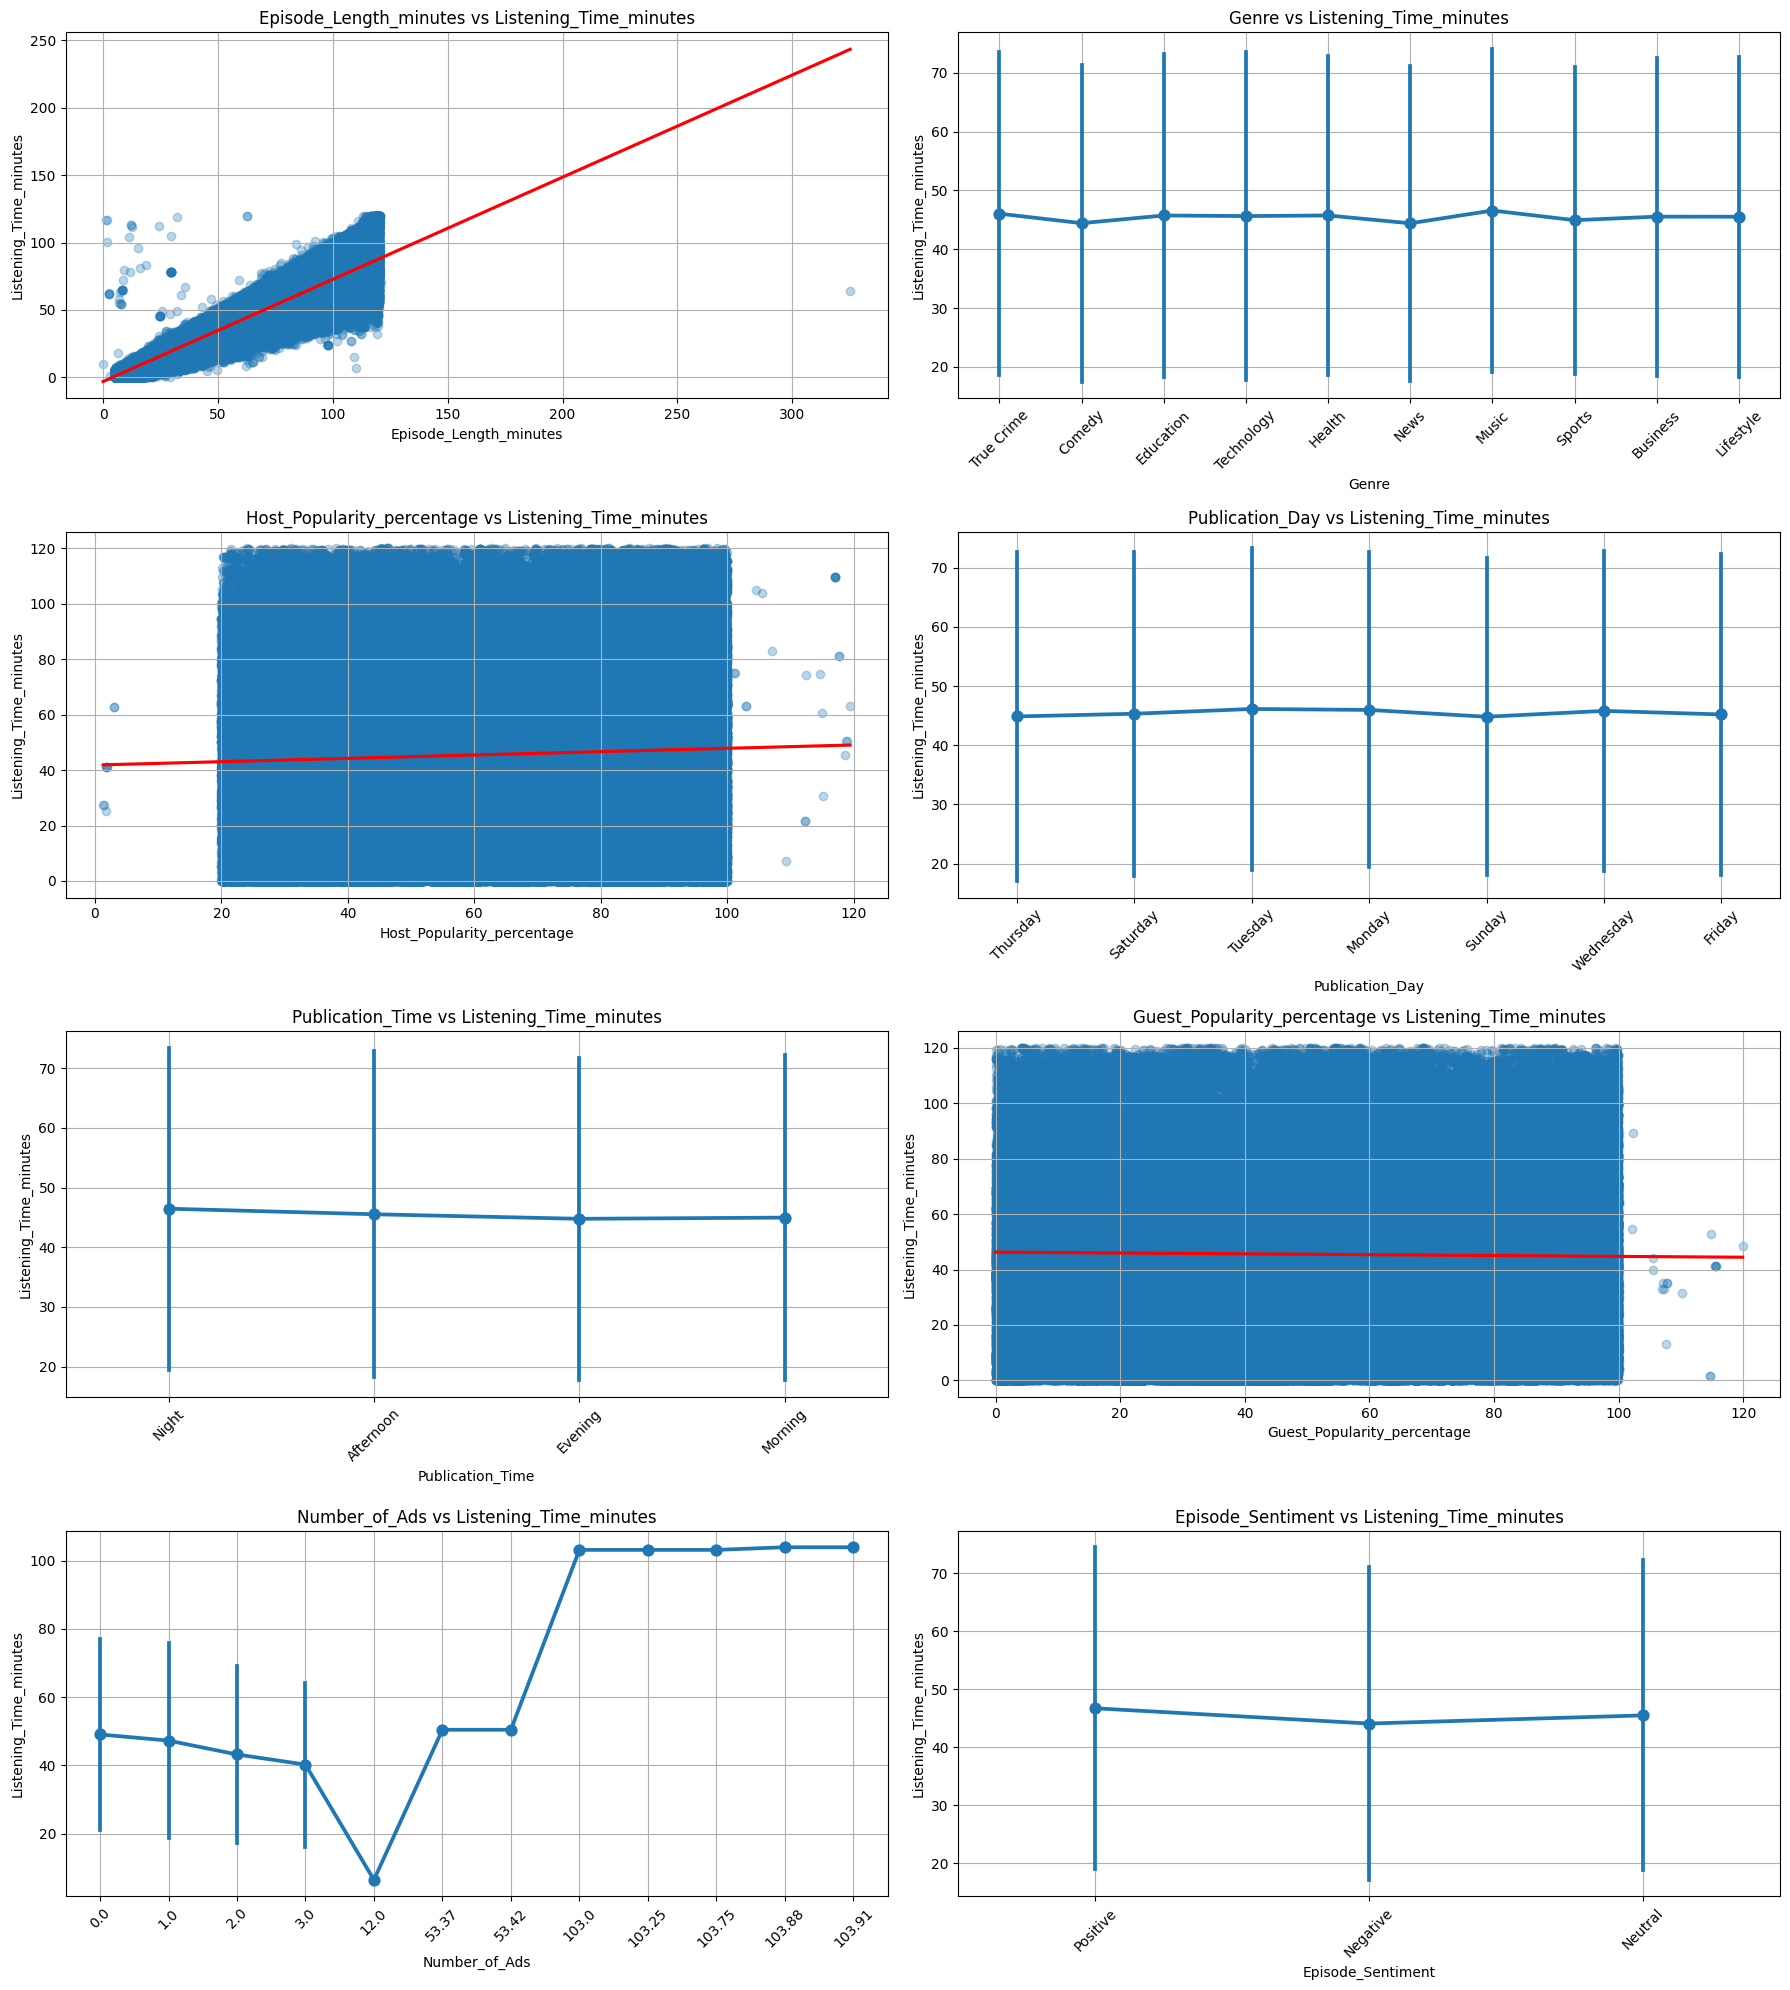

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_column_vs_target(df, target_col='Listening_Time_minutes', skip_cols=None):
    """
    Plots relationships between feature columns and the target using regplot for continuous
    and pointplot for categorical features.

    Args:
        df (pd.DataFrame): Dataset
        target_col (str): Target column to compare against
        skip_cols (list): Columns to skip (e.g., ID fields)
    """
    if skip_cols is None:
        skip_cols = []

    # Determine columns to plot
    cols_to_plot = [col for col in df.columns if col != target_col and col not in skip_cols]

    num_cols = len(cols_to_plot)
    num_rows = (num_cols + 1) // 2

    plt.figure(figsize=(18, 5 * num_rows))

    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(num_rows, 2, i)

        # If object or few unique values: treat as categorical
        if df[col].dtype == 'object' or df[col].nunique() <= 15:
            sns.pointplot(data=df, x=col, y=target_col, errorbar='sd', join=True)
            plt.xticks(rotation=45)
        else:
            sns.regplot(data=df, x=col, y=target_col, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})

        plt.title(f"{col} vs {target_col}")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage (excluding 'id' and 'Podcast_Name', etc.)
plot_column_vs_target(df, skip_cols=[
    'id', 'Podcast_Name', 'Episode_Title'  # Ignored string identifiers
])

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [144]:
# function to column Tranform the data and drop one row and convert to dtype int8
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def columnTransformation(columns: list[str], dataframe: pd.DataFrame) -> pd.DataFrame:
    columnTransformer = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop='first', sparse_output=False), columns)
        ],
        remainder='passthrough'
    )

    x_transformed = columnTransformer.fit_transform(dataframe)
    new_columns = columnTransformer.get_feature_names_out()

    df_transformed = pd.DataFrame(x_transformed, columns=new_columns)

    for col in new_columns:
        try:
            df_transformed[col] = df_transformed[col].astype('int8')
        except ValueError:
            pass  # skip if it’s not a one-hot column

    return df_transformed

In [145]:
categorical_columns = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

In [146]:
df1 = columnTransformation(categorical_columns, df)

In [147]:
df1.shape

(750000, 171)

In [148]:
X = df1.drop(columns=['remainder__Listening_Time_minutes'])
y = df1['remainder__Listening_Time_minutes']

In [149]:
X.head()

,onehot__Podcast_Name_Brain Boost,onehot__Podcast_Name_Business Briefs,onehot__Podcast_Name_Business Insights,onehot__Podcast_Name_Comedy Corner,onehot__Podcast_Name_Crime Chronicles,onehot__Podcast_Name_Criminal Minds,onehot__Podcast_Name_Current Affairs,onehot__Podcast_Name_Daily Digest,onehot__Podcast_Name_Detective Diaries,onehot__Podcast_Name_Digital Digest,...,onehot__Publication_Day_Wednesday,onehot__Publication_Time_Evening,onehot__Publication_Time_Morning,onehot__Publication_Time_Night,onehot__Episode_Sentiment_Neutral,onehot__Episode_Sentiment_Positive,remainder__Episode_Length_minutes,remainder__Host_Popularity_percentage,remainder__Guest_Popularity_percentage,remainder__Number_of_Ads
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,NaN,74,NaN,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,119.80,66,75.95,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,73.90,69,8.97,0.0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,67.17,57,78.70,2.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,110.51,80,58.68,3.0


In [150]:
X[X.columns[X.isnull().any()]].isnull().sum()

,0
remainder__Episode_Length_minutes,87093
remainder__Guest_Popularity_percentage,146030
remainder__Number_of_Ads,1


In [151]:
def fill_missing_with_mean(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    for col in columns:
        df[col] = df[col].fillna(df[col].mean())
    return df

In [152]:
columns_with_nulls = ['remainder__Episode_Length_minutes', 'remainder__Guest_Popularity_percentage', 'remainder__Number_of_Ads']
X = fill_missing_with_mean(X, columns_with_nulls)

In [153]:
X[X.columns[X.isnull().any()]].isnull().sum()

,0


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7579235088536843

In [155]:
# X_new = df.drop(columns=['Listening_Time_minutes'])
# y_new = df['Listening_Time_minutes']

In [156]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LightGBM supports categorical columns as string/object or category dtype
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert categorical columns to 'category' dtype
for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train, categorical_feature=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"LightGBM R² Score: {score:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 170
[LightGBM] [Info] Start training from score 44.955027
LightGBM R² Score: 0.7676


In [157]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split

# models = {
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=10),
#     'Random Forest': RandomForestRegressor(n_estimators=10),
# }

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train & evaluate models
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     score = r2_score(y_test, y_pred)

#     print(f"{name} R² Score: {score:.4f}")

In [158]:
test_path = os.path.join(playground_series_s5e4_path, 'test.csv')  # This was incorrectly loading train.csv earlier
test_df = pd.read_csv(test_path)

In [159]:
id_col = test_df['id']
test_df1 = test_df.drop(columns=['id'])

In [160]:
id_col.head()

,id
0,750000
1,750001
2,750002
3,750003
4,750004


In [161]:
test_df1.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment'],
      dtype='object')

In [162]:
test_df1 = columnTransformation(categorical_columns, test_df)
test_df1.shape

(250000, 171)

In [163]:
test_df1[test_df1.columns[test_df1.isnull().any()]].isnull().sum()

,0
remainder__Episode_Length_minutes,28736
remainder__Guest_Popularity_percentage,48832


In [164]:
columns_with_nulls = ['remainder__Episode_Length_minutes', 'remainder__Guest_Popularity_percentage']
test_df1 = fill_missing_with_mean(test_df1, columns_with_nulls)

In [165]:
test_df1 = test_df1.drop(columns=['remainder__id'])

In [166]:
lr.predict(test_df1)

array([54.61737866, 18.552957  , 50.85643117, ...,  2.13105445,
       79.23209143, 56.1698722 ])

In [167]:
submission_df = pd.DataFrame({
    'id': id_col,
    'Listening_Time_minutes': lr.predict(test_df1)
})

In [168]:
submission_df.shape

(250000, 2)

In [169]:
submission_df.head()

,id,Listening_Time_minutes
0,750000,54.617379
1,750001,18.552957
2,750002,50.856431
3,750003,80.225711
4,750004,49.696507


In [170]:
# submission_df.to_csv('submission.csv', index=False)